<a href="https://colab.research.google.com/github/vrohra99/mtp/blob/main/Health_FD004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
 
 
uploaded = files.upload()

Saving train_FD004.txt to train_FD004.txt


In [14]:
pip install hmmlearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import pandas as pd
from hmmlearn.hmm import GMMHMM, GaussianHMM
from hmmlearn.base import BaseHMM
from sklearn.preprocessing import StandardScaler
import io

In [16]:
traindata = pd.read_csv(io.BytesIO(uploaded['train_FD004.txt']), sep= " ", header = None )
traindata.drop([26,27],inplace=True,axis=1)
traindata.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,...,129.78,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,...,312.59,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,...,129.62,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,...,129.80,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,...,164.11,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754


In [17]:
engines=int(traindata.loc[traindata.shape[0]-1][0])
engines

249

In [18]:
hpc_kpi=[7,11,15]


In [19]:
hiddenstates=30

In [20]:
startprob=[0]*hiddenstates
startprob[0]=1
print(startprob)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [21]:
import numpy as np
transmat=np.identity(hiddenstates)
for i in range(0,hiddenstates-1):
    transmat[i][i]=0.5
    transmat[i][i+1]=0.5

In [22]:
health_state=[]

In [23]:
def iterate(i):
  try:
    hpc=traindata.loc[traindata[0]==i][hpc_kpi]
    hpc=StandardScaler().fit_transform(hpc)
    model = GMMHMM(n_components=30, covariance_type="diag", init_params="cm", params="cmt")
    model.transmat_=transmat
    model.startprob_=startprob
    model.fit(hpc)
    pred=model.decode(hpc,algorithm="viterbi")[1]
    health_state.append(pred)
    print(i)
  except:
    iterate(i)

In [24]:
for i in range(1,engines+1):
  iterate(i)
  print("*******************************************************************************************************************************************************************************")

/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


1
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


2
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


3
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


4
*******************************************************************************************************************************************************************************


5
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


6
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


7
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]


8
*******************************************************************************************************************************************************************************


9
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


10
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


11
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


12
*******************************************************************************************************************************************************************************


13
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]


14
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


15
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


16
*******************************************************************************************************************************************************************************


17
*******************************************************************************************************************************************************************************


18
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


19
*******************************************************************************************************************************************************************************


20
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


21
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


22
*******************************************************************************************************************************************************************************


23
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


24
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


25
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


26
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


27
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


28
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


29
*******************************************************************************************************************************************************************************


30
*******************************************************************************************************************************************************************************


31
*******************************************************************************************************************************************************************************


32
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


33
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


34
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


35
*******************************************************************************************************************************************************************************


36
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


37
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


38
*******************************************************************************************************************************************************************************


39
*******************************************************************************************************************************************************************************


40
*******************************************************************************************************************************************************************************


41
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


42
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


43
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: invalid value encountered in true_divide
  self.covars_ = c_n / c_d


44
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


45
*******************************************************************************************************************************************************************************


46
*******************************************************************************************************************************************************************************


47
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]


48
*******************************************************************************************************************************************************************************


49
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


50
*******************************************************************************************************************************************************************************


51
*******************************************************************************************************************************************************************************


52
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


53
*******************************************************************************************************************************************************************************


54
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


55
*******************************************************************************************************************************************************************************


56
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


57
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


58
*******************************************************************************************************************************************************************************


59
*******************************************************************************************************************************************************************************


60
*******************************************************************************************************************************************************************************


61
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


62
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


63
*******************************************************************************************************************************************************************************


64
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


65
*******************************************************************************************************************************************************************************


66
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


67
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


68
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


69
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


70
*******************************************************************************************************************************************************************************


71
*******************************************************************************************************************************************************************************


72
*******************************************************************************************************************************************************************************


73
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


74
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


75
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


76
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


77
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


78
*******************************************************************************************************************************************************************************


79
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


80
*******************************************************************************************************************************************************************************


81
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


82
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


83
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


84
*******************************************************************************************************************************************************************************


85
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


86
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


87
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


88
*******************************************************************************************************************************************************************************


89
*******************************************************************************************************************************************************************************


90
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


91
*******************************************************************************************************************************************************************************


92
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


93
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


94
*******************************************************************************************************************************************************************************


95
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


96
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


97
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


98
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


99
*******************************************************************************************************************************************************************************


100
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


101
*******************************************************************************************************************************************************************************


102
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


103
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


104
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


105
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


106
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


107
*******************************************************************************************************************************************************************************


108
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


109
*******************************************************************************************************************************************************************************


110
*******************************************************************************************************************************************************************************


111
*******************************************************************************************************************************************************************************


112
*******************************************************************************************************************************************************************************


113
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


114
*******************************************************************************************************************************************************************************


115
*******************************************************************************************************************************************************************************


116
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


117
*******************************************************************************************************************************************************************************


118
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


119
*******************************************************************************************************************************************************************************


120
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


121
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


122
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


123
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


124
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


125
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


126
*******************************************************************************************************************************************************************************


127
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


128
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


129
*******************************************************************************************************************************************************************************


130
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


131
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


132
*******************************************************************************************************************************************************************************


133
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


134
*******************************************************************************************************************************************************************************


135
*******************************************************************************************************************************************************************************


136
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


137
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


138
*******************************************************************************************************************************************************************************


139
*******************************************************************************************************************************************************************************


140
*******************************************************************************************************************************************************************************


141
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


142
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


143
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]


144
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]


145
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


146
*******************************************************************************************************************************************************************************


147
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


148
*******************************************************************************************************************************************************************************


149
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d


150
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


151
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


152
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


153
*******************************************************************************************************************************************************************************


154
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


155
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


156
*******************************************************************************************************************************************************************************


157
*******************************************************************************************************************************************************************************


158
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


159
*******************************************************************************************************************************************************************************


160
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


161
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


162
*******************************************************************************************************************************************************************************


163
*******************************************************************************************************************************************************************************


164
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


165
*******************************************************************************************************************************************************************************


166
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


167
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


168
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]


169
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


170
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


171
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


172
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


173
*******************************************************************************************************************************************************************************


174
*******************************************************************************************************************************************************************************


175
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


176
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


177
*******************************************************************************************************************************************************************************


178
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


179
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


180
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


181
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


182
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


183
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


184
*******************************************************************************************************************************************************************************


185
*******************************************************************************************************************************************************************************


186
*******************************************************************************************************************************************************************************


187
*******************************************************************************************************************************************************************************


188
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


189
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


190
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


191
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


192
*******************************************************************************************************************************************************************************


193
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


194
*******************************************************************************************************************************************************************************


195
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


196
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


197
*******************************************************************************************************************************************************************************


198
*******************************************************************************************************************************************************************************


199
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


200
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


201
*******************************************************************************************************************************************************************************


202
*******************************************************************************************************************************************************************************


203
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


204
*******************************************************************************************************************************************************************************


205
*******************************************************************************************************************************************************************************


206
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


207
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


208
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


209
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


210
*******************************************************************************************************************************************************************************


211
*******************************************************************************************************************************************************************************


212
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


213
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


214
*******************************************************************************************************************************************************************************


215
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


216
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


217
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


218
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


219
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


220
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


221
*******************************************************************************************************************************************************************************


222
*******************************************************************************************************************************************************************************


223
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


224
*******************************************************************************************************************************************************************************


225
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


226
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


227
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


228
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


229
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


230
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


231
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


232
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


233
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


234
*******************************************************************************************************************************************************************************


235
*******************************************************************************************************************************************************************************


236
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


237
*******************************************************************************************************************************************************************************


238
*******************************************************************************************************************************************************************************


239
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


240
*******************************************************************************************************************************************************************************


241
*******************************************************************************************************************************************************************************


242
*******************************************************************************************************************************************************************************


243
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


244
*******************************************************************************************************************************************************************************


245
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


246
*******************************************************************************************************************************************************************************


247
*******************************************************************************************************************************************************************************


248
*******************************************************************************************************************************************************************************


249
*******************************************************************************************************************************************************************************


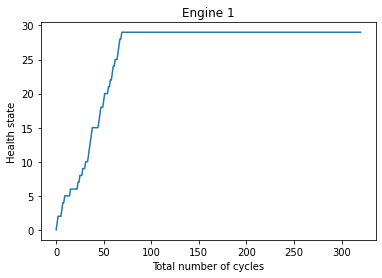

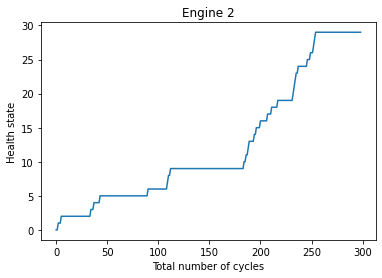

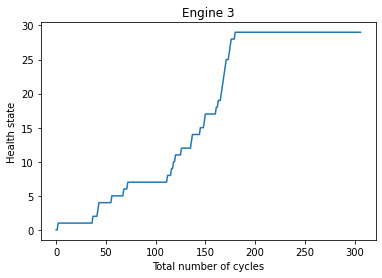

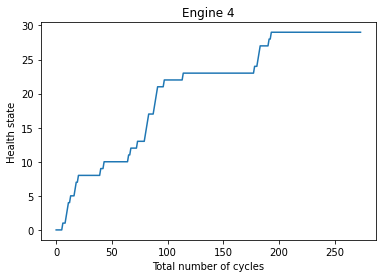

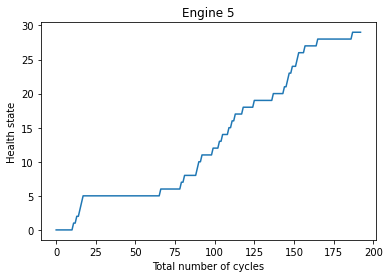

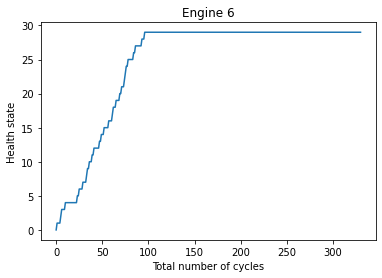

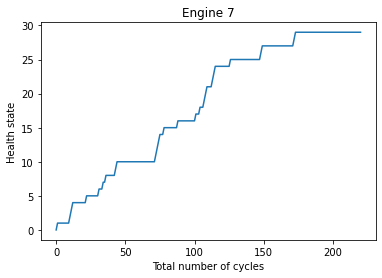

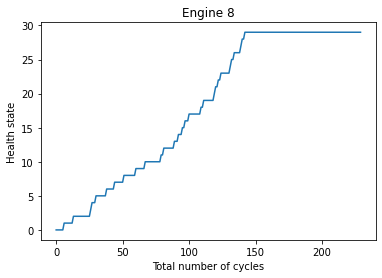

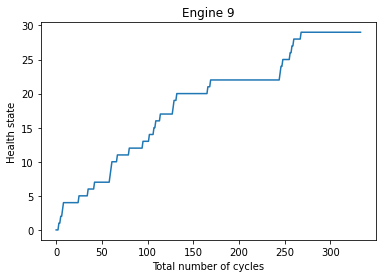

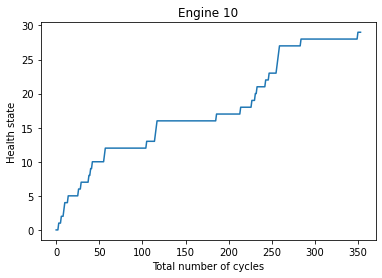

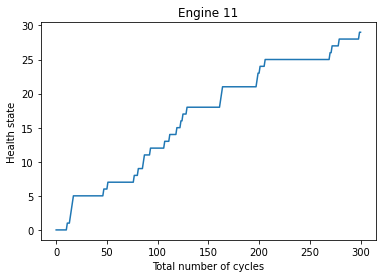

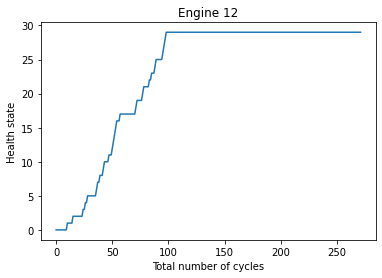

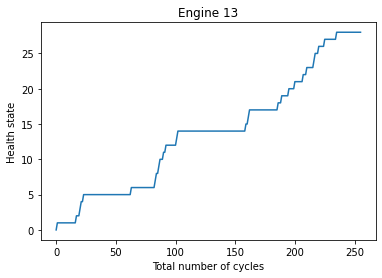

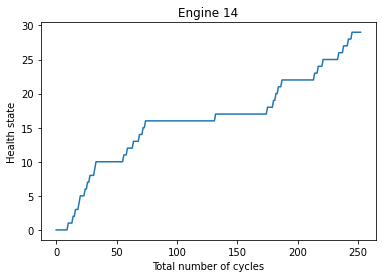

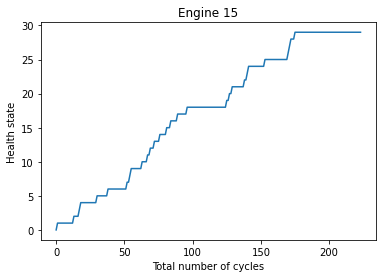

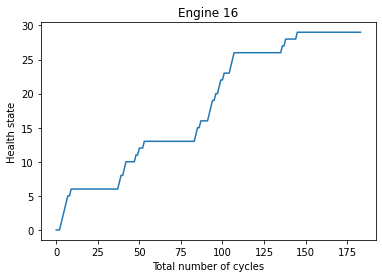

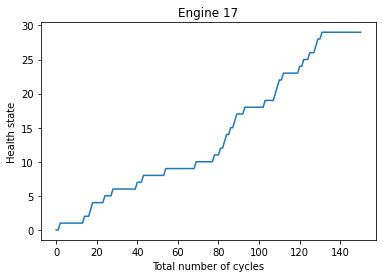

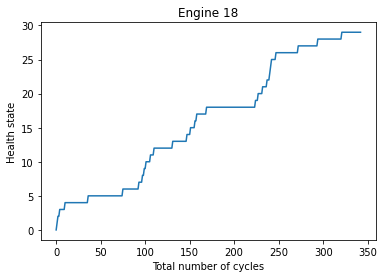

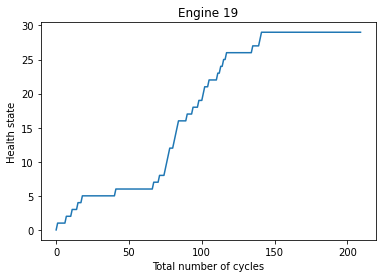

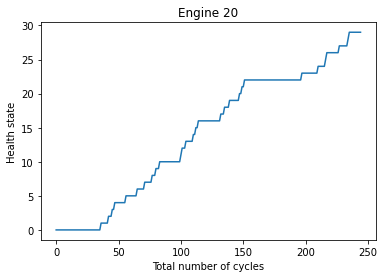

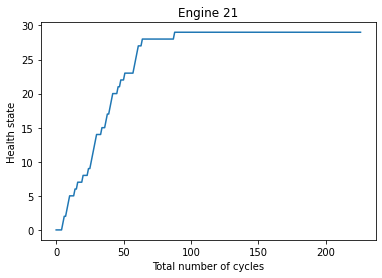

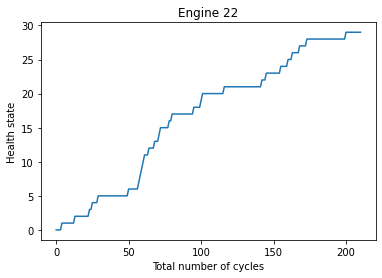

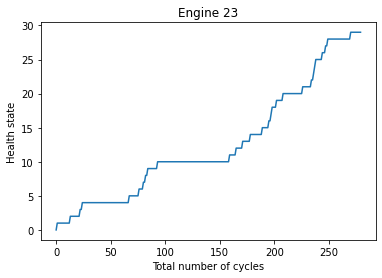

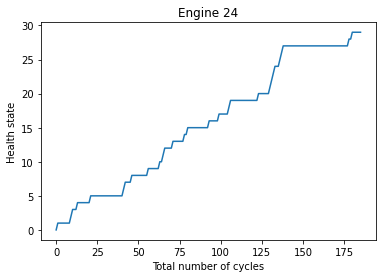

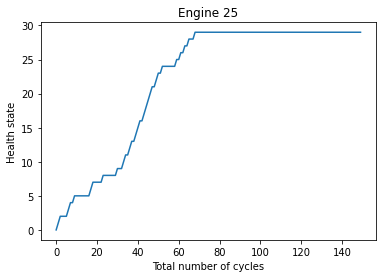

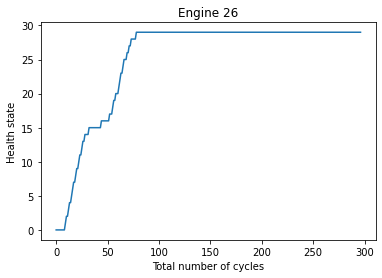

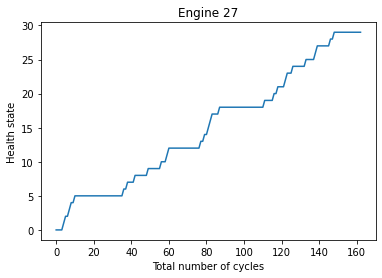

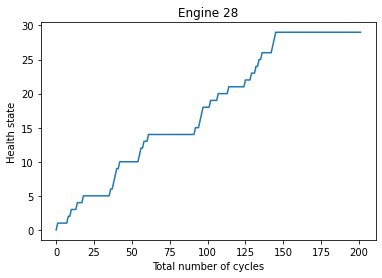

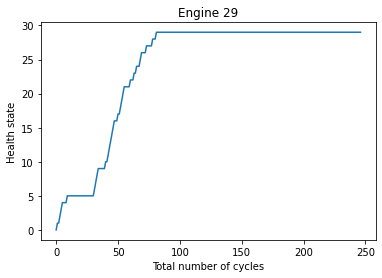

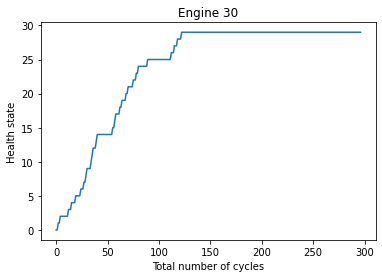

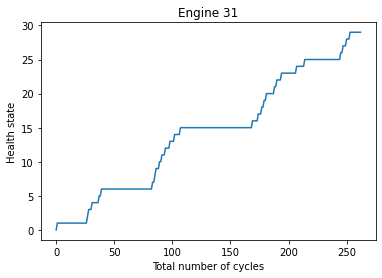

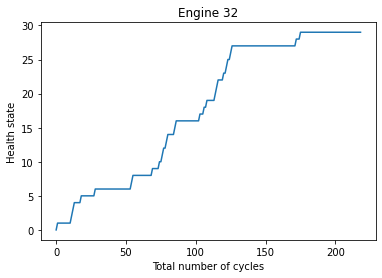

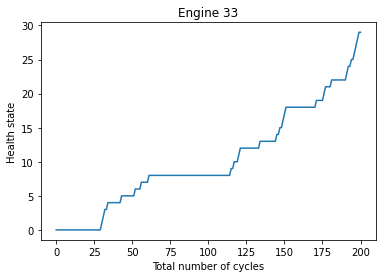

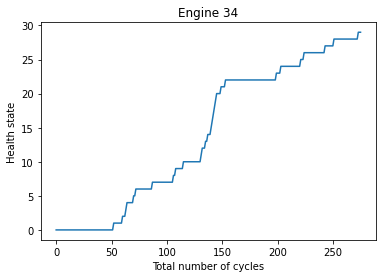

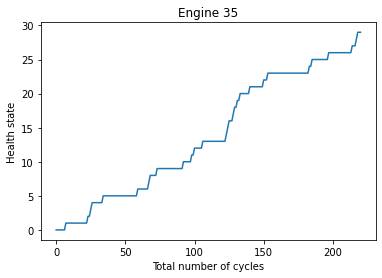

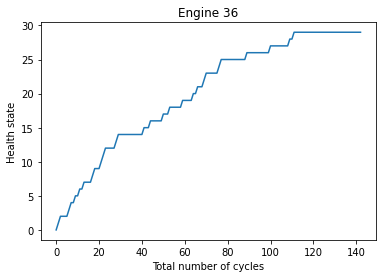

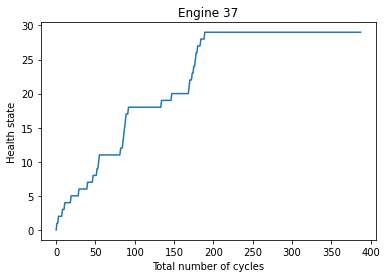

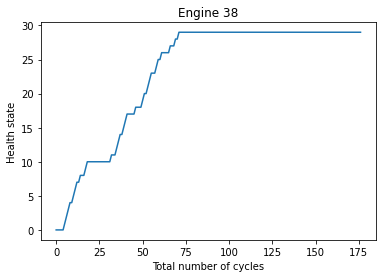

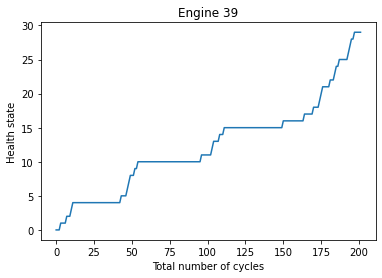

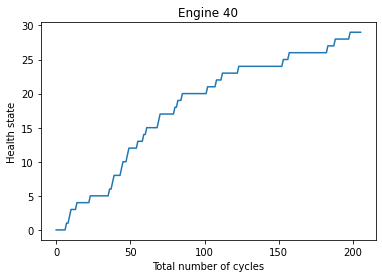

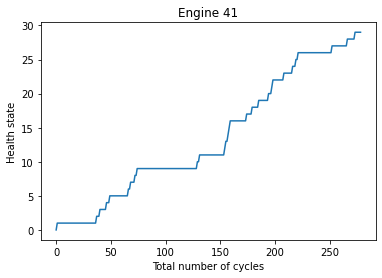

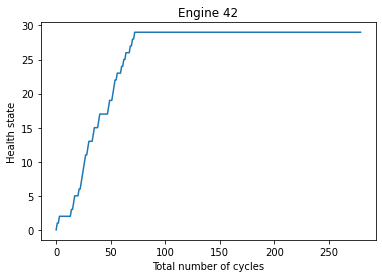

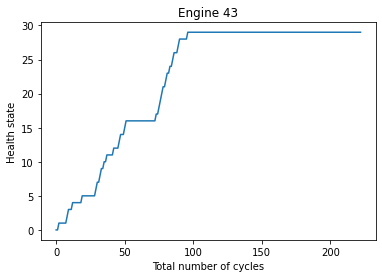

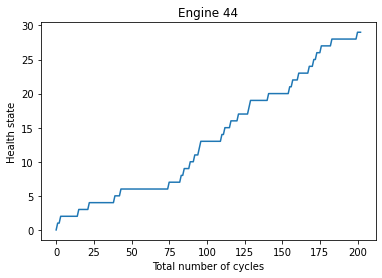

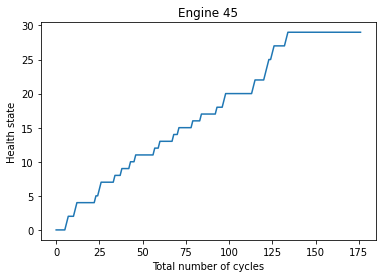

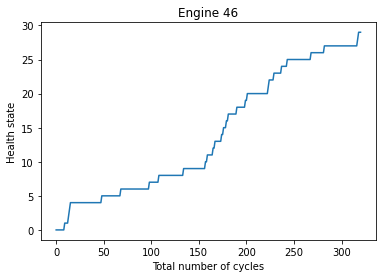

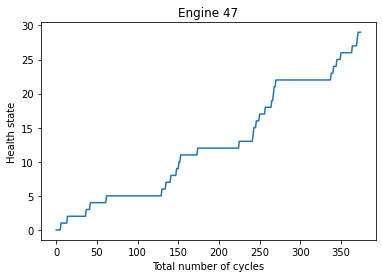

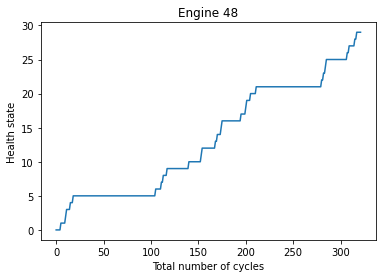

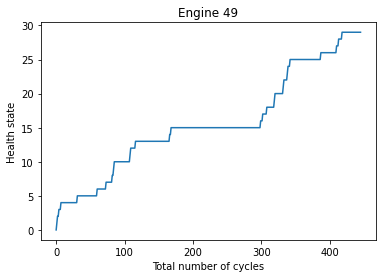

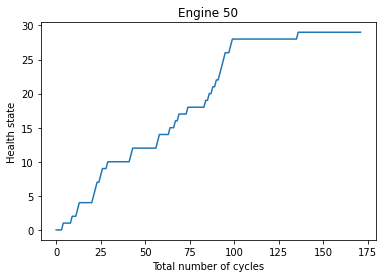

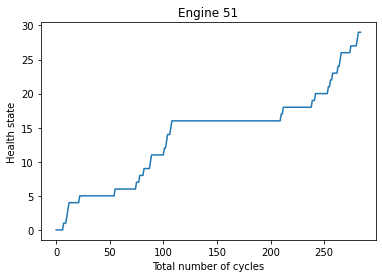

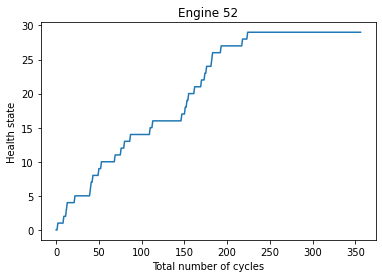

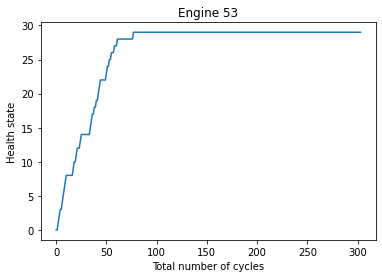

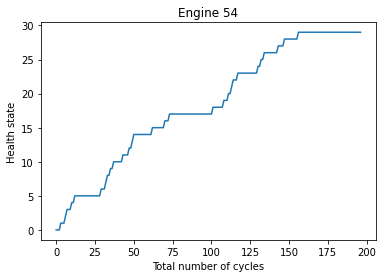

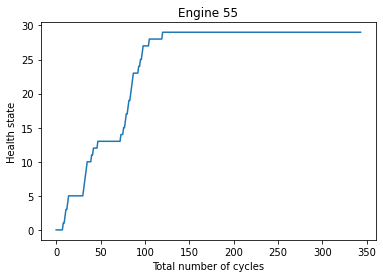

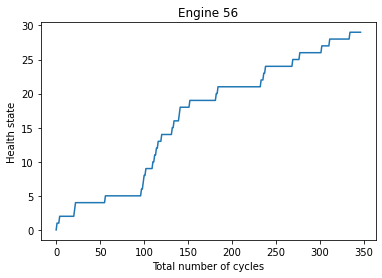

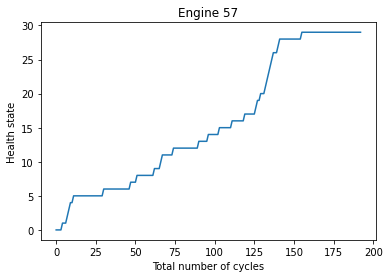

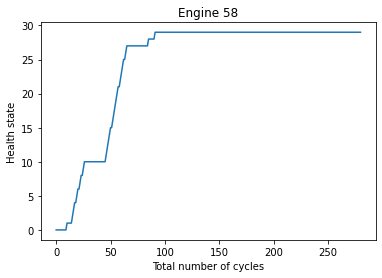

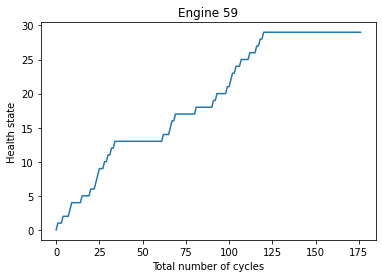

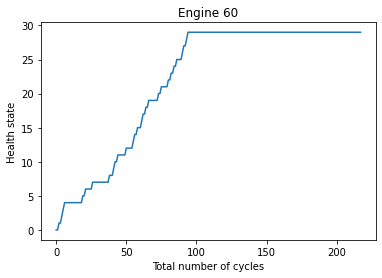

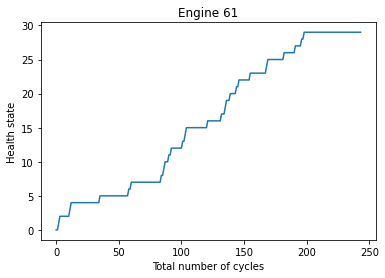

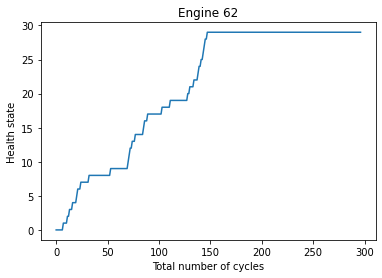

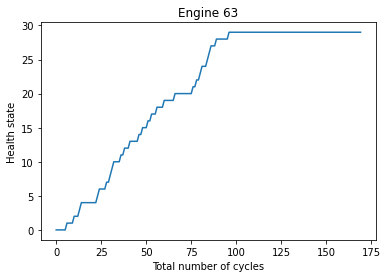

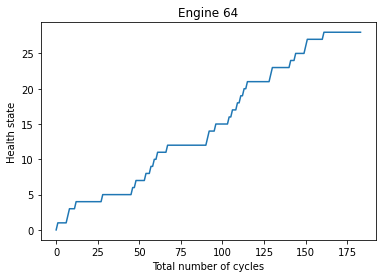

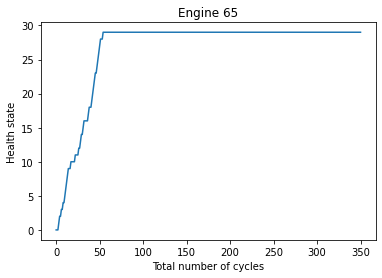

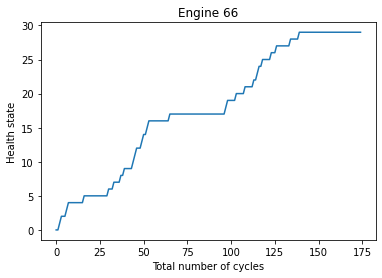

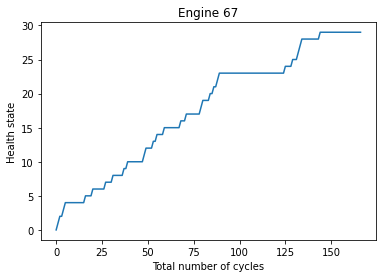

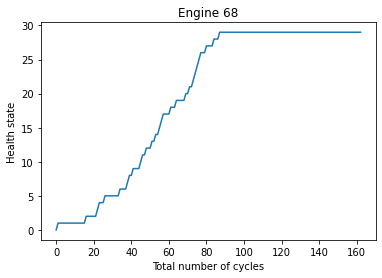

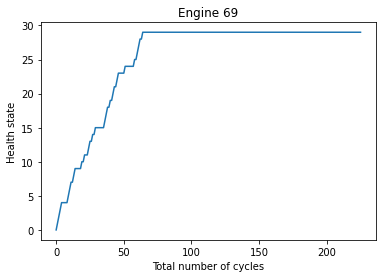

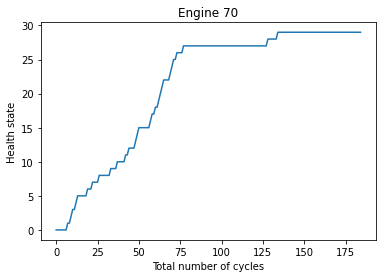

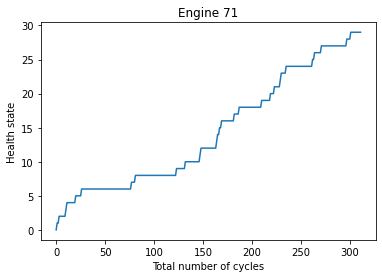

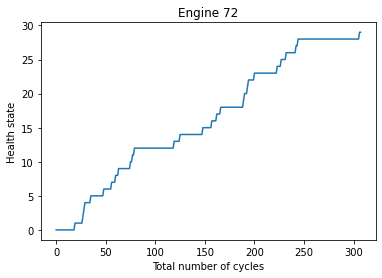

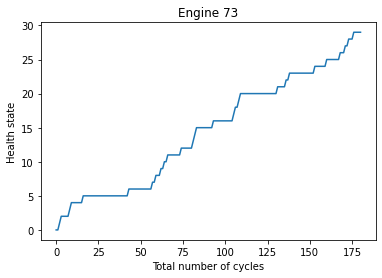

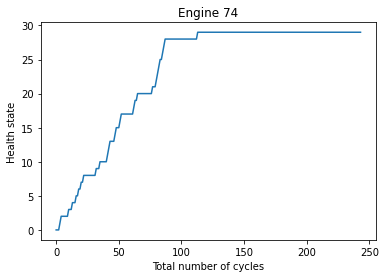

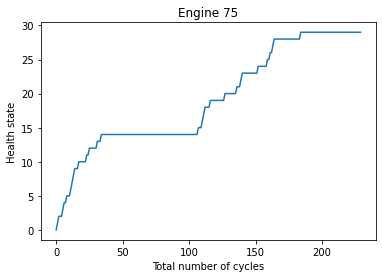

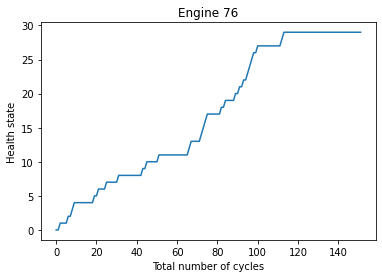

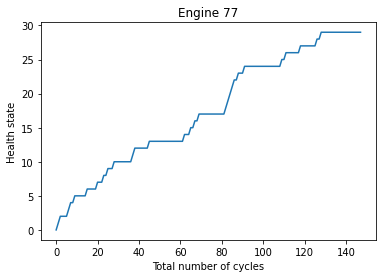

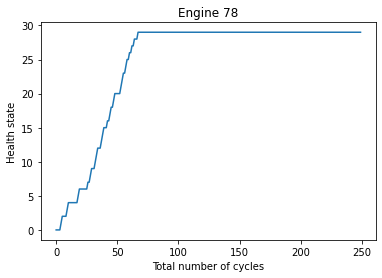

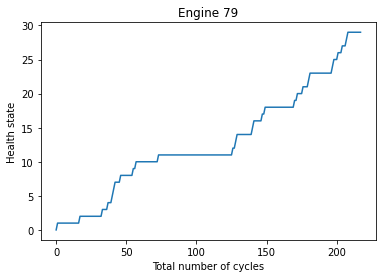

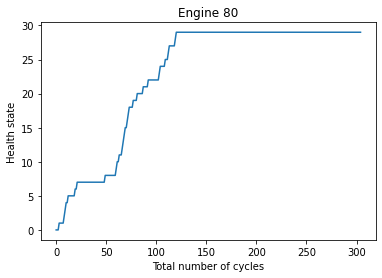

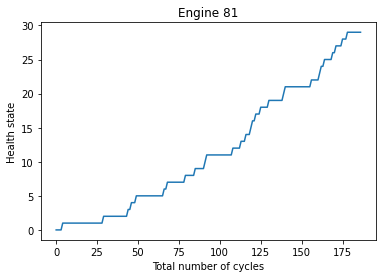

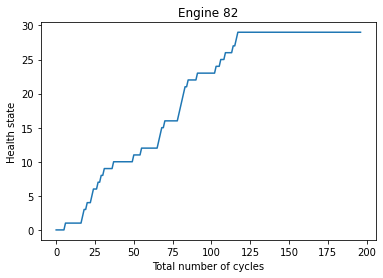

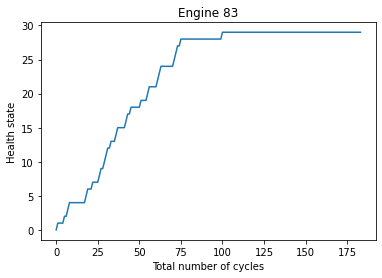

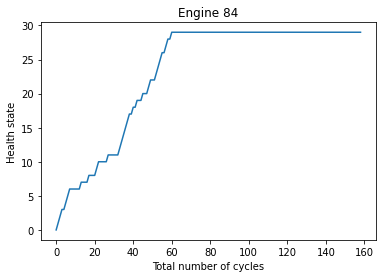

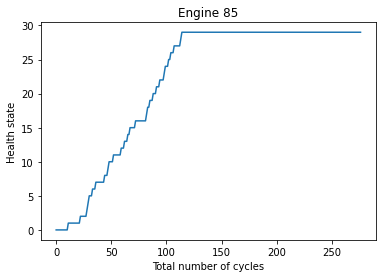

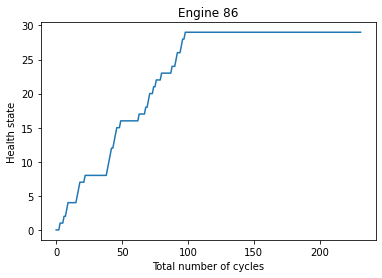

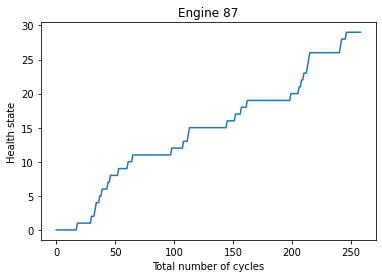

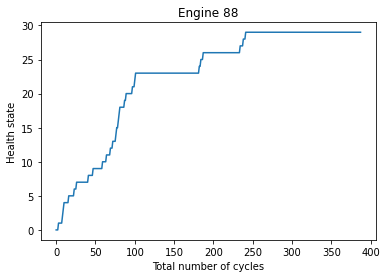

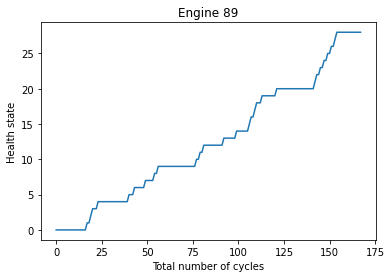

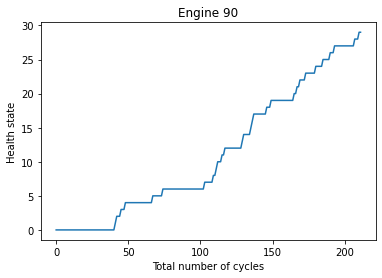

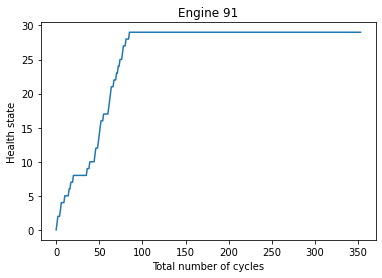

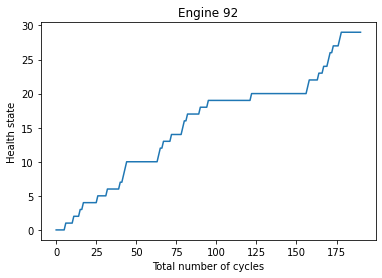

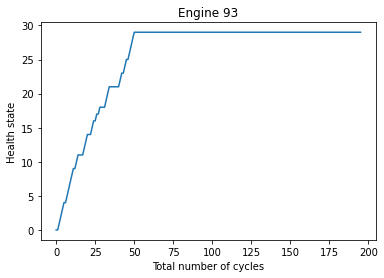

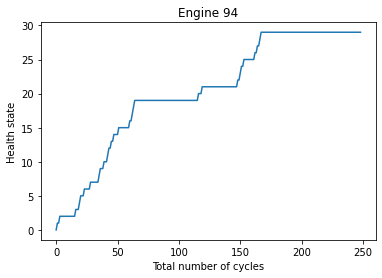

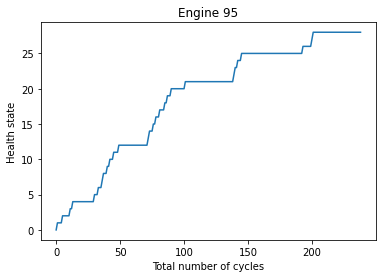

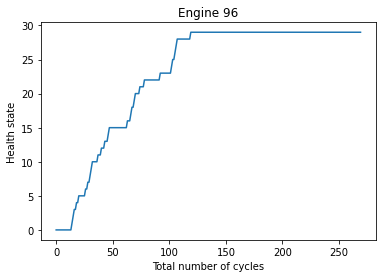

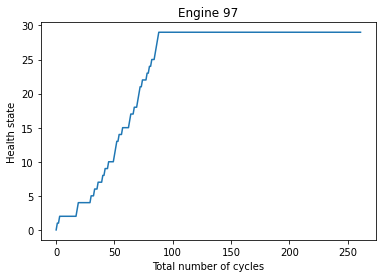

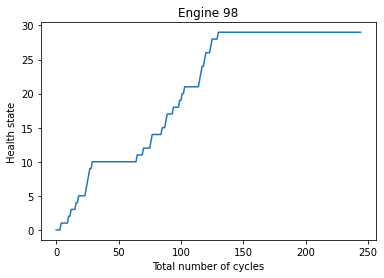

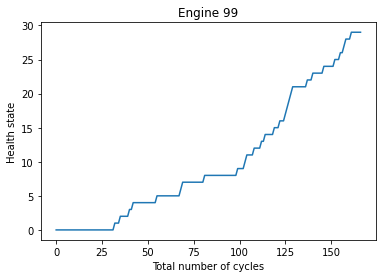

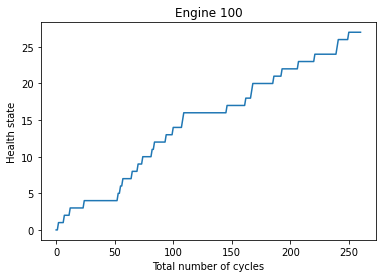

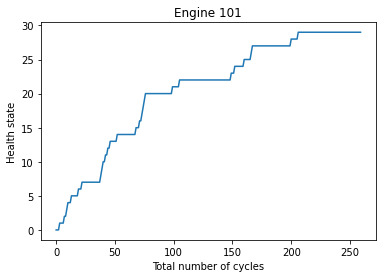

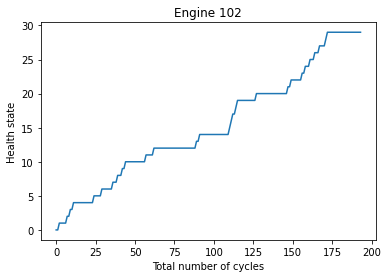

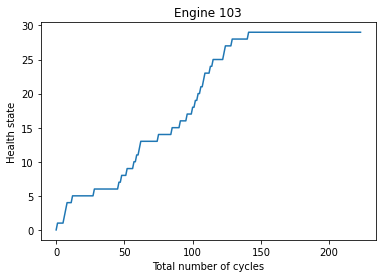

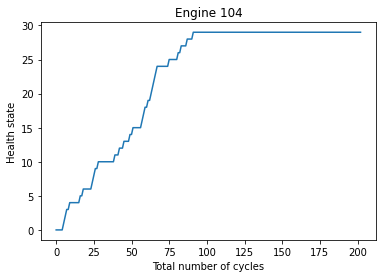

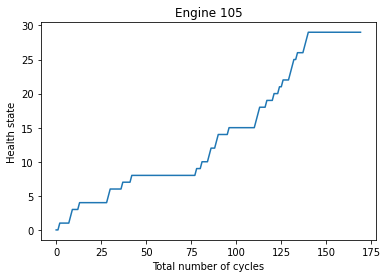

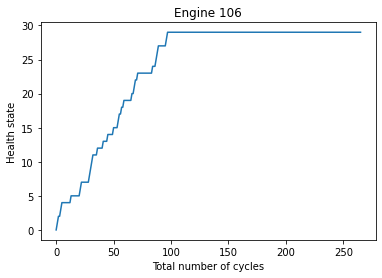

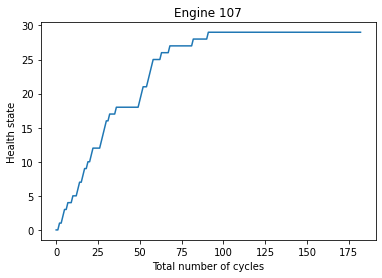

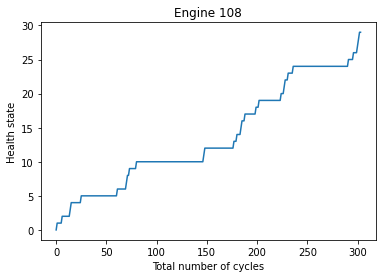

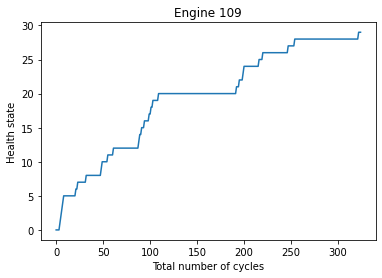

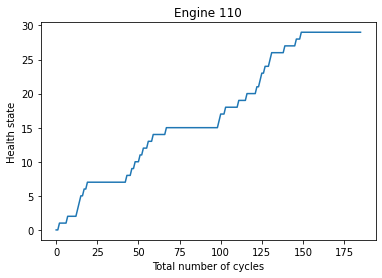

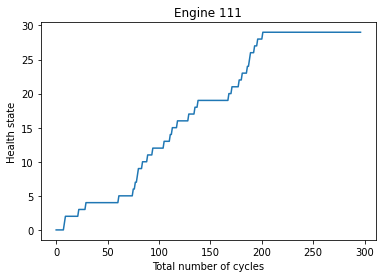

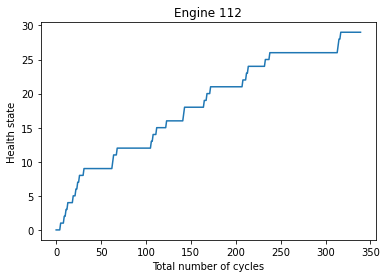

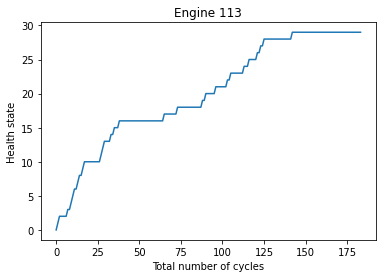

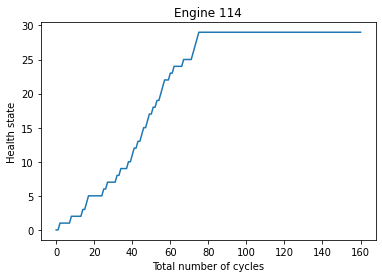

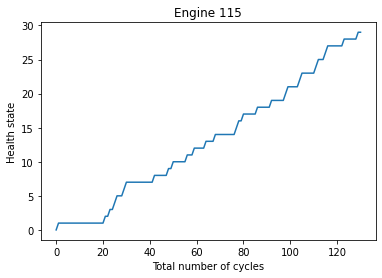

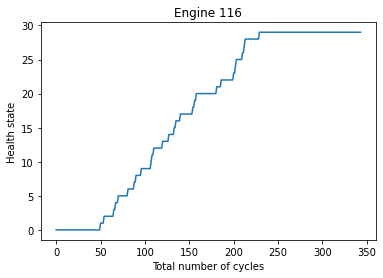

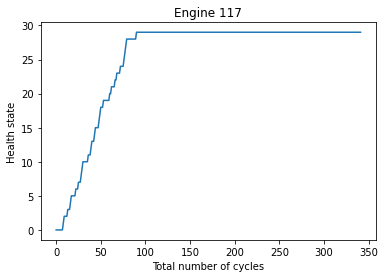

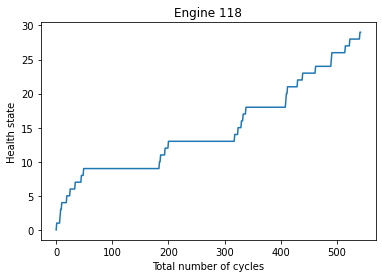

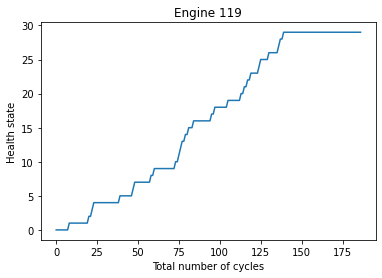

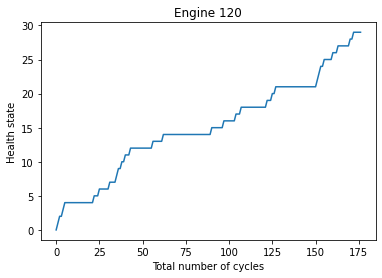

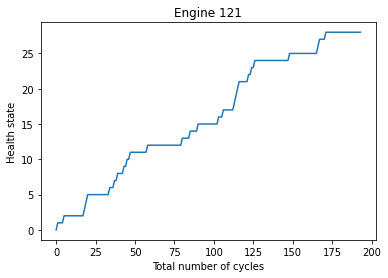

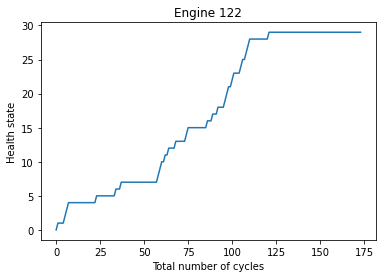

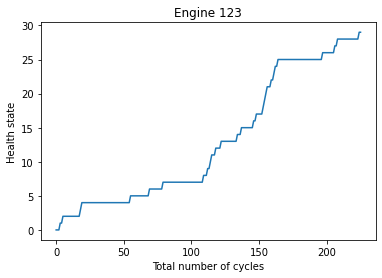

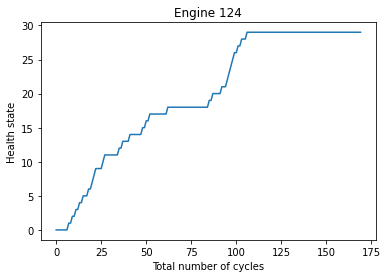

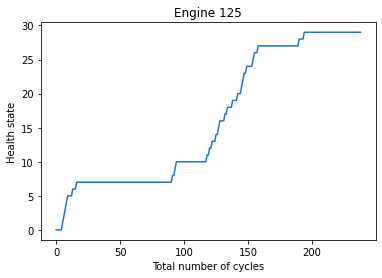

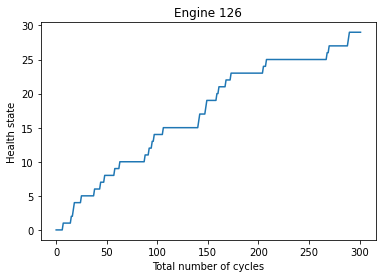

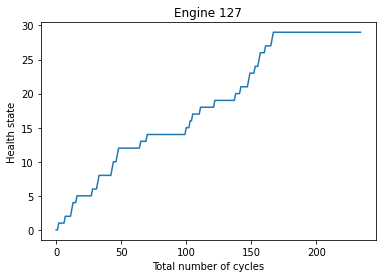

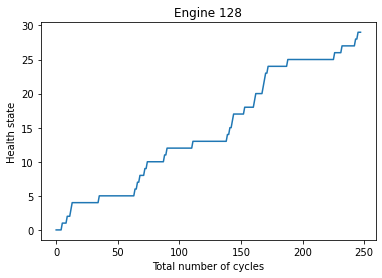

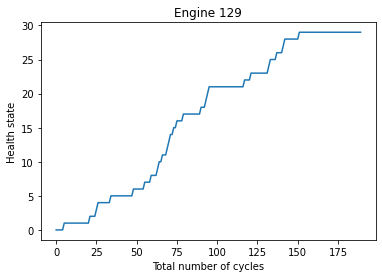

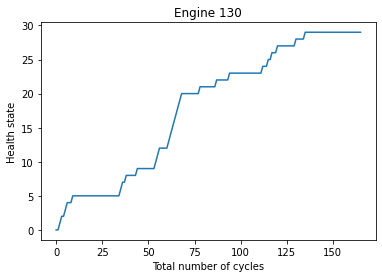

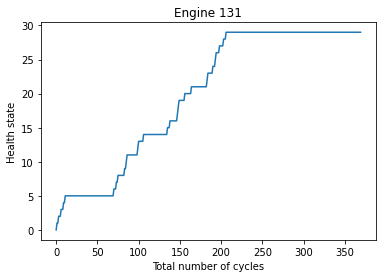

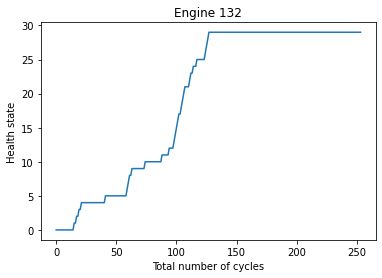

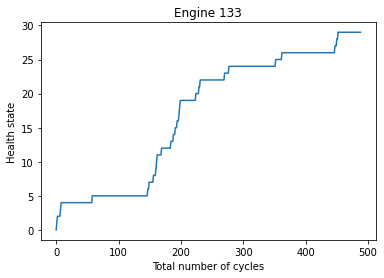

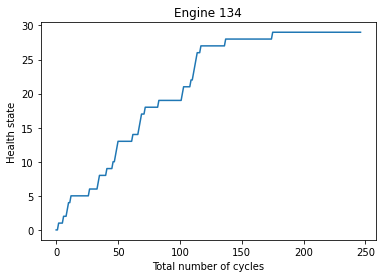

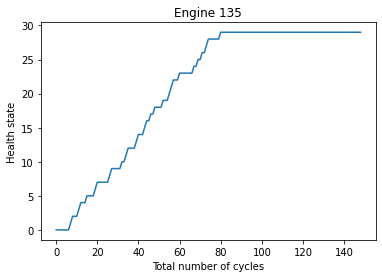

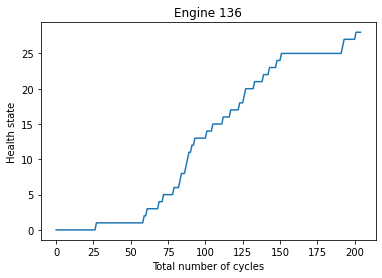

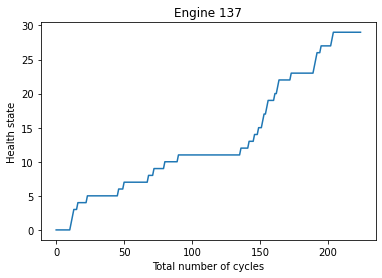

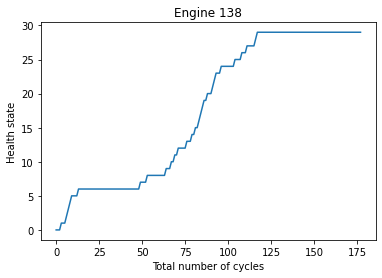

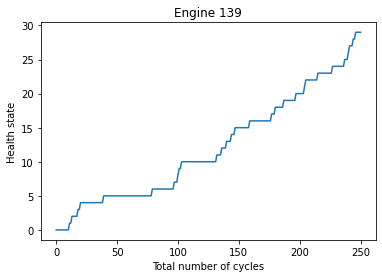

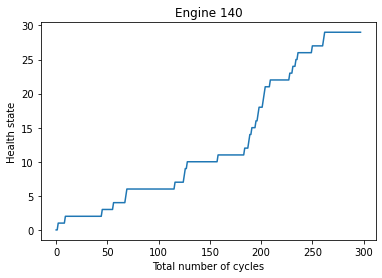

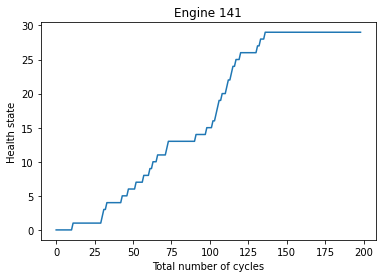

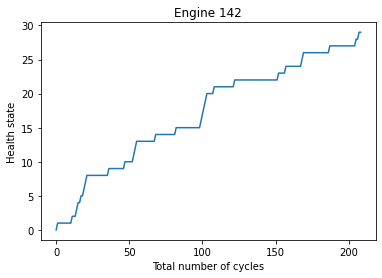

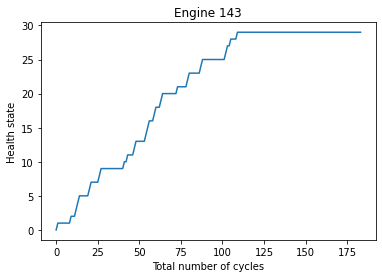

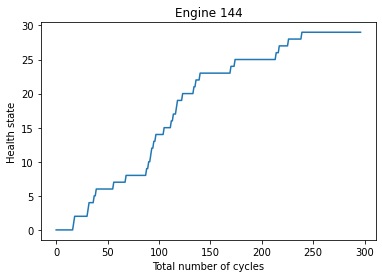

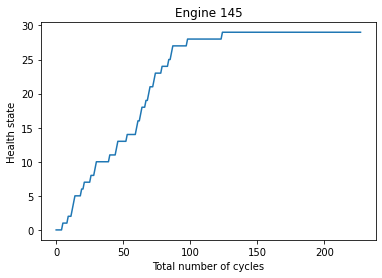

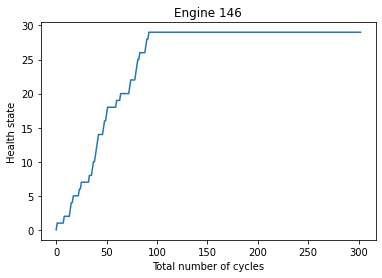

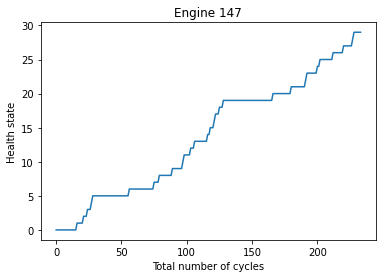

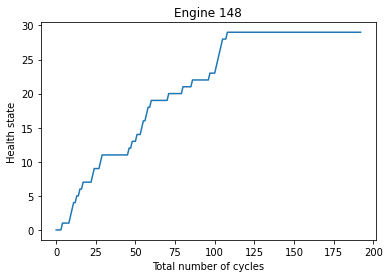

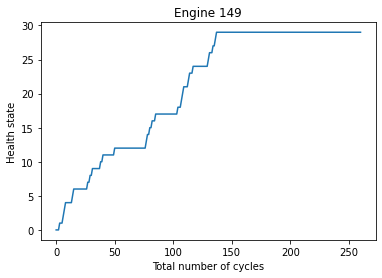

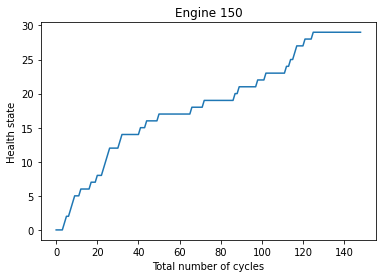

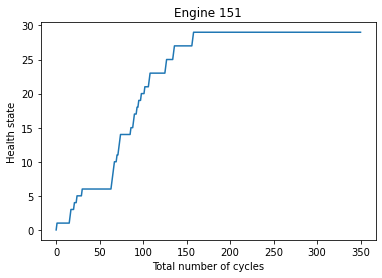

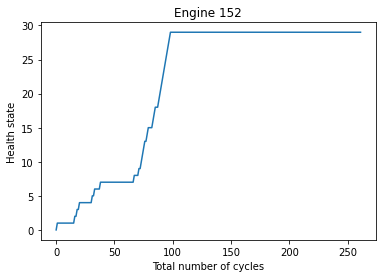

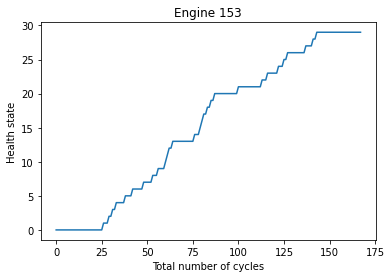

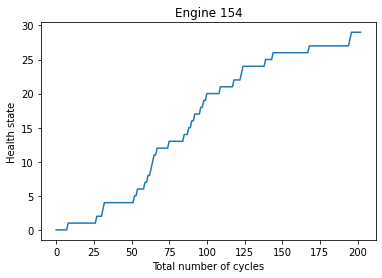

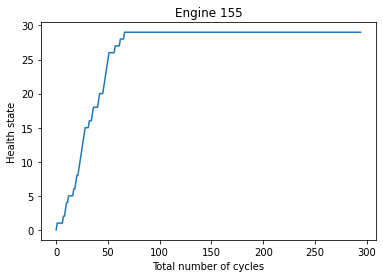

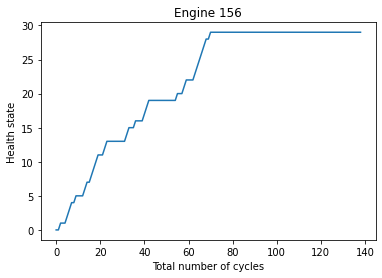

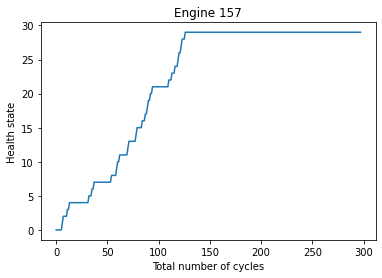

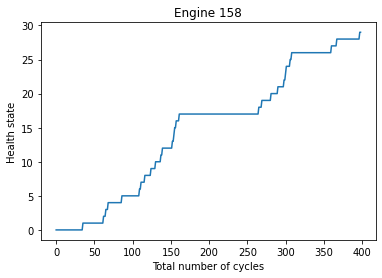

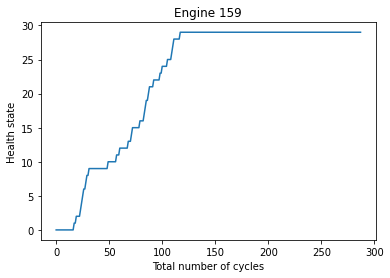

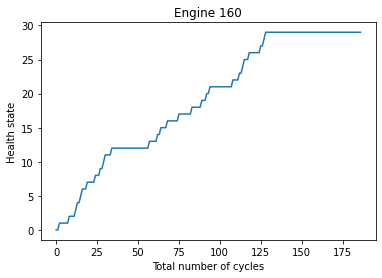

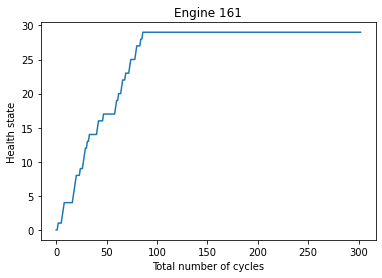

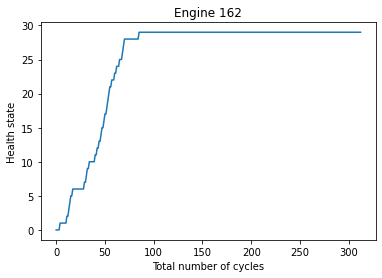

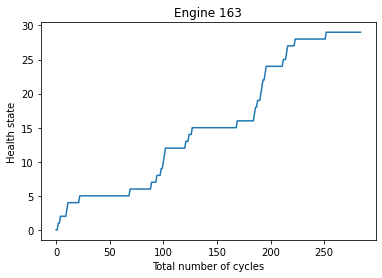

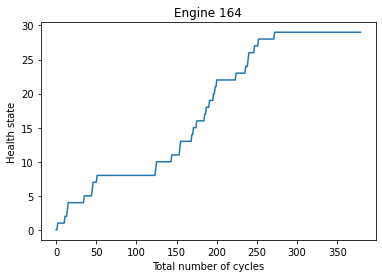

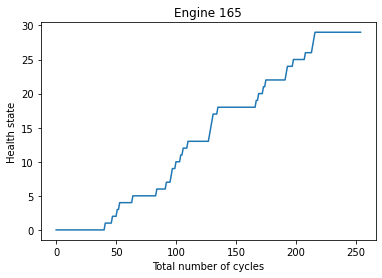

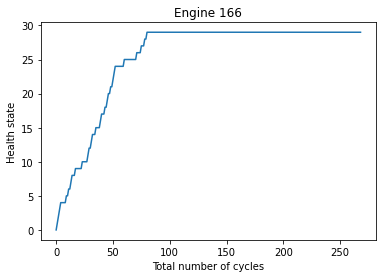

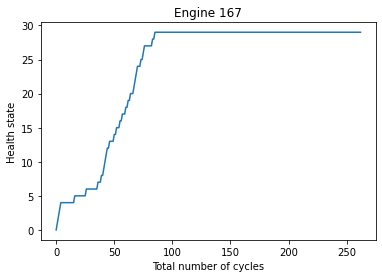

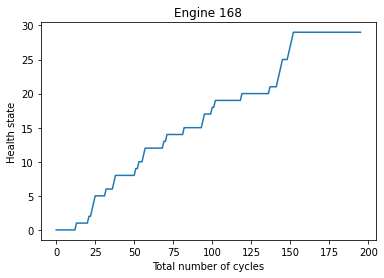

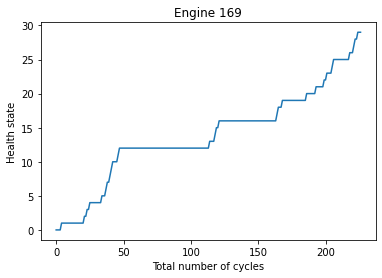

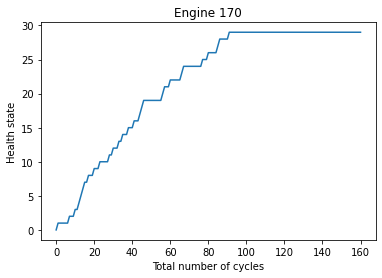

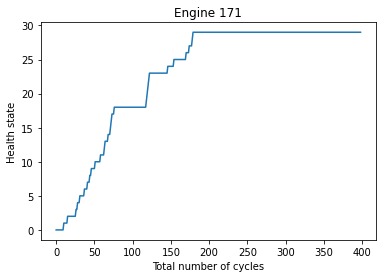

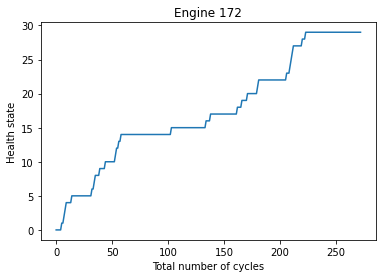

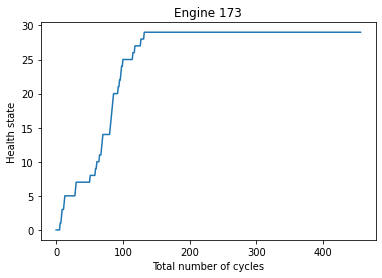

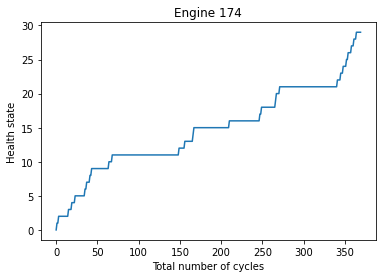

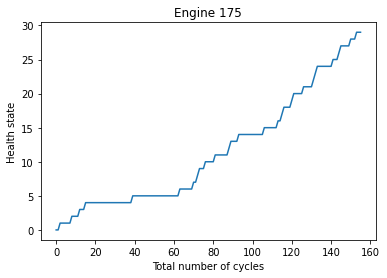

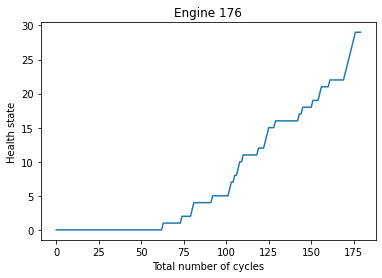

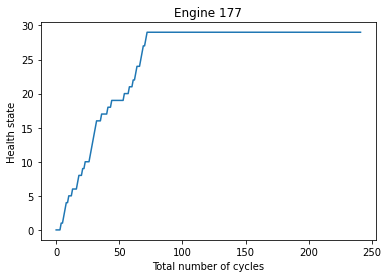

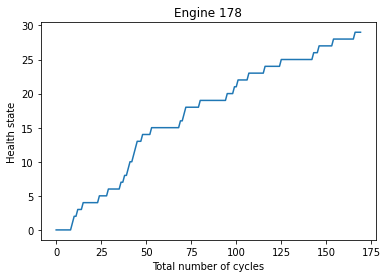

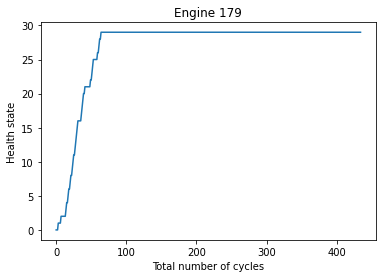

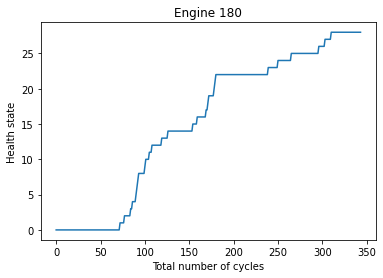

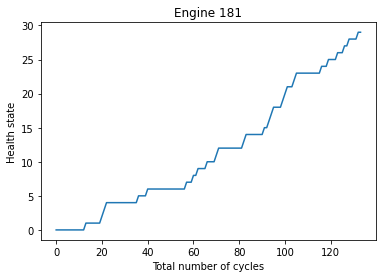

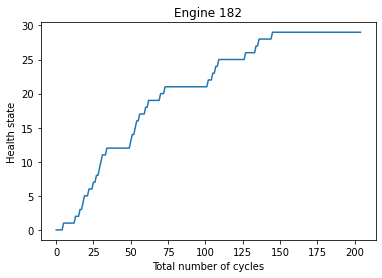

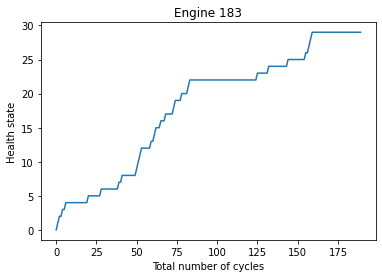

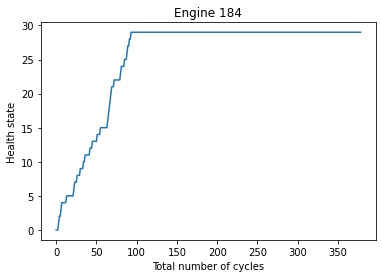

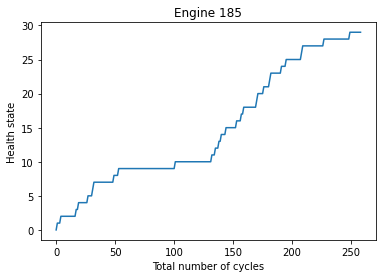

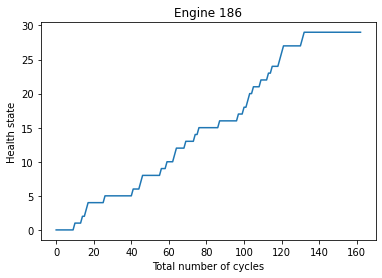

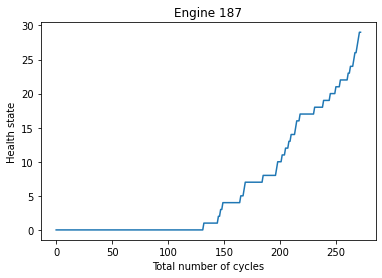

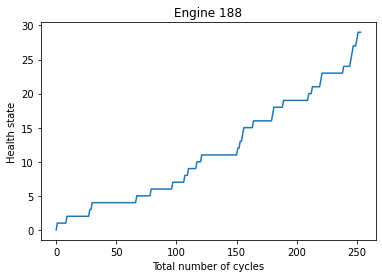

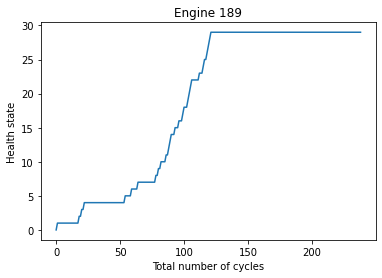

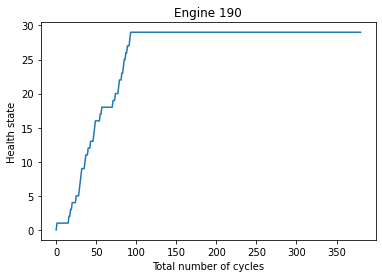

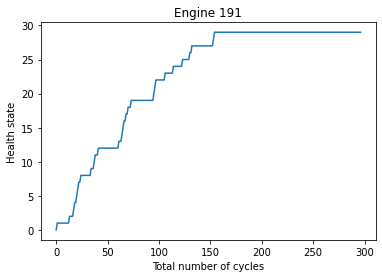

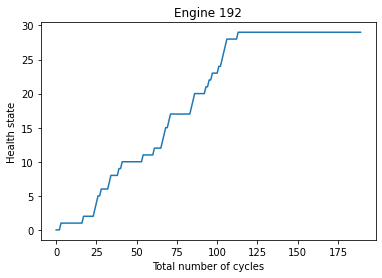

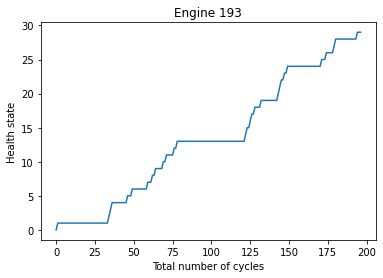

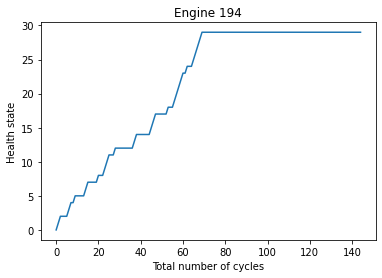

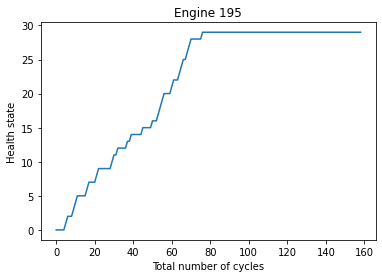

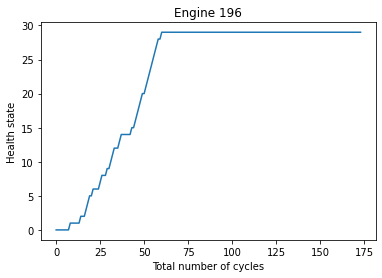

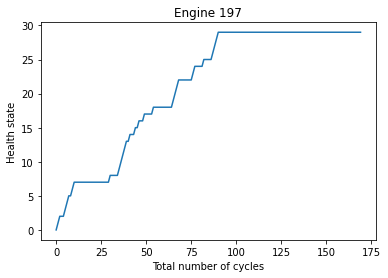

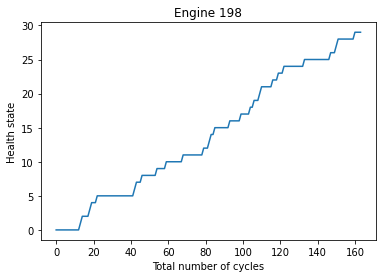

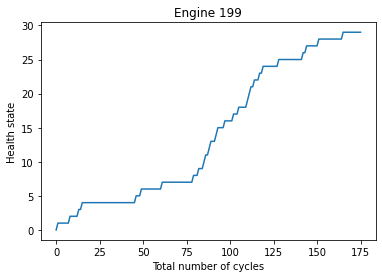

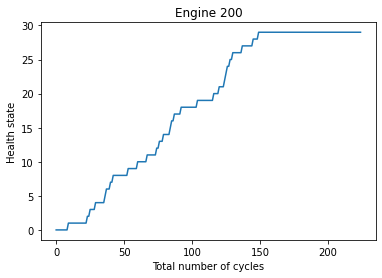

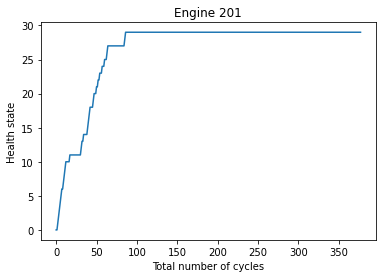

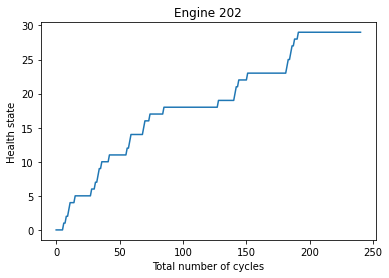

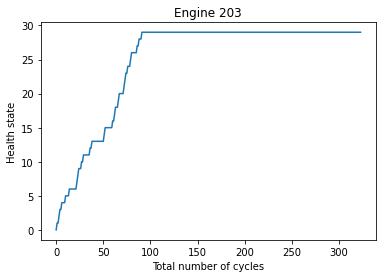

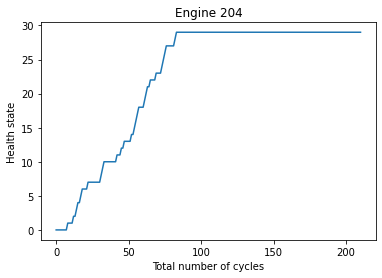

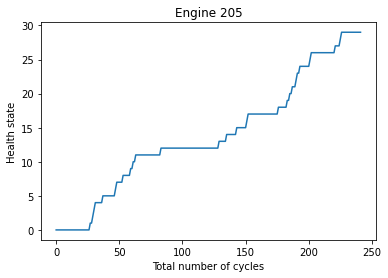

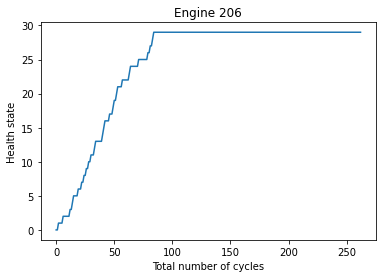

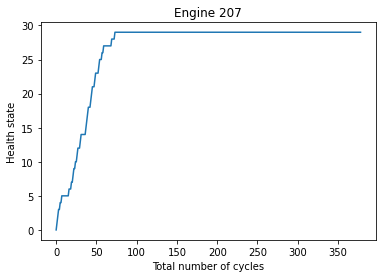

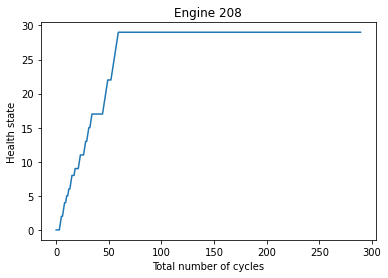

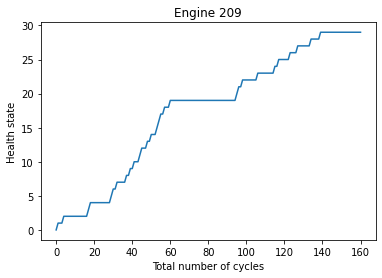

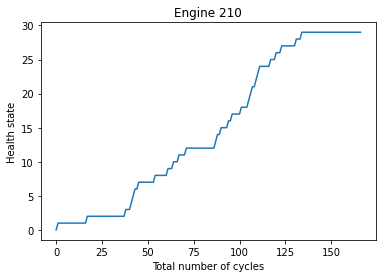

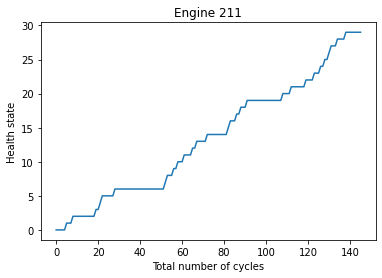

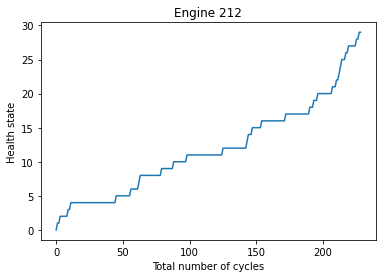

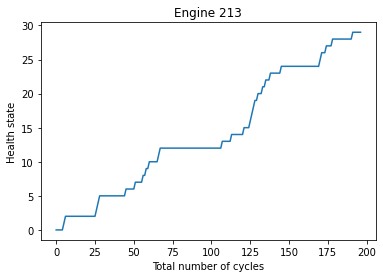

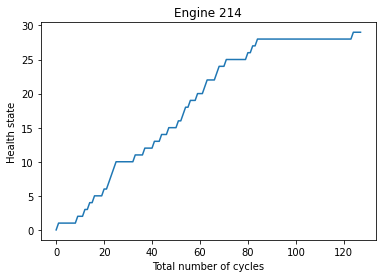

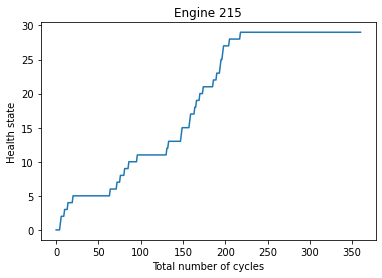

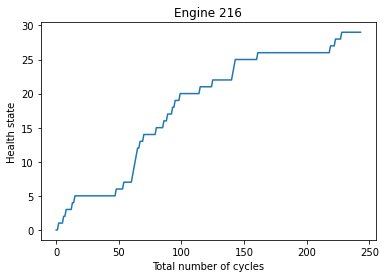

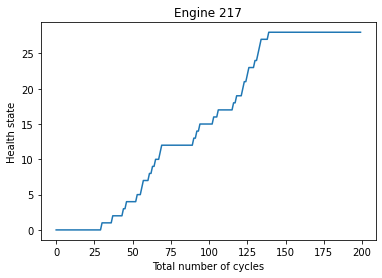

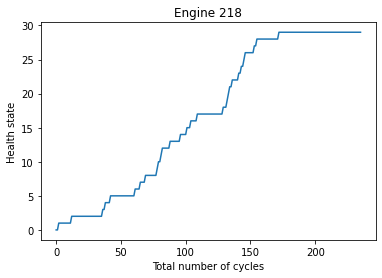

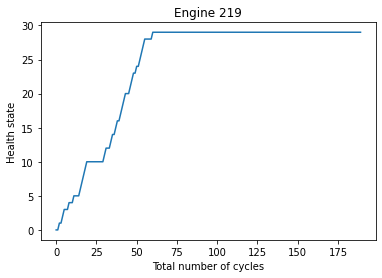

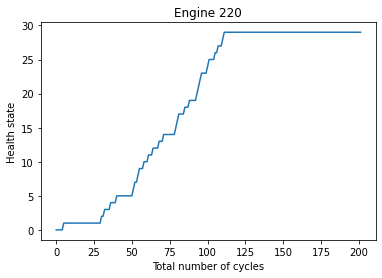

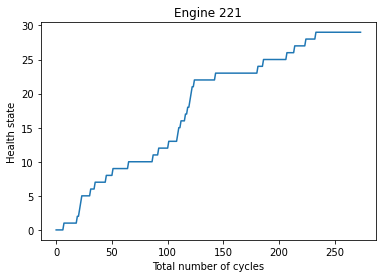

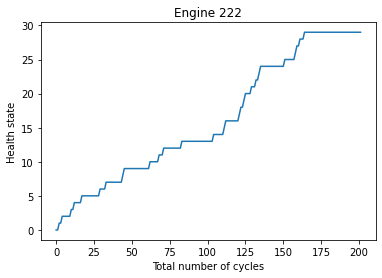

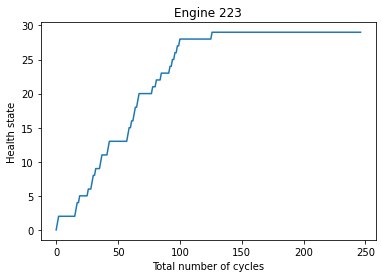

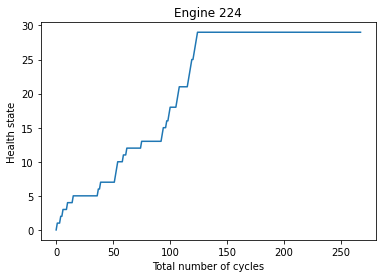

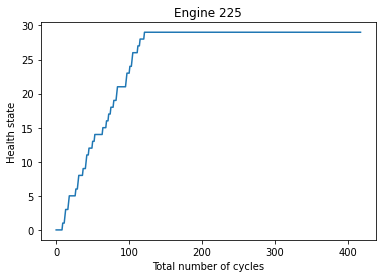

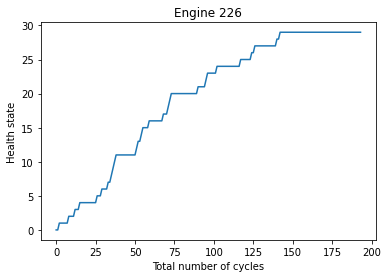

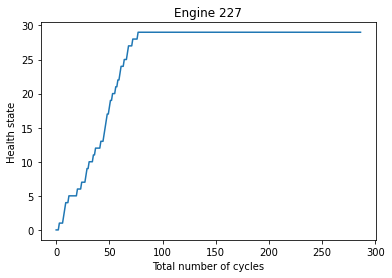

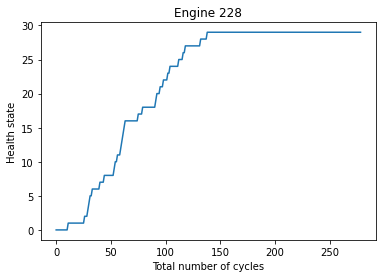

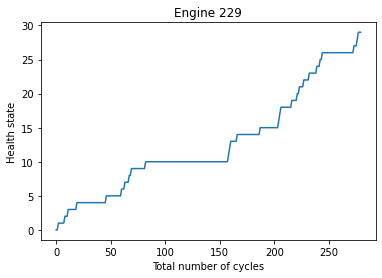

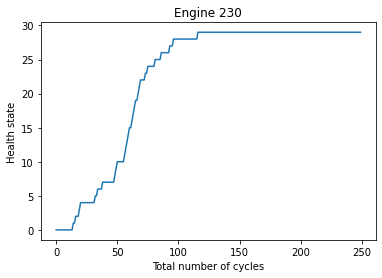

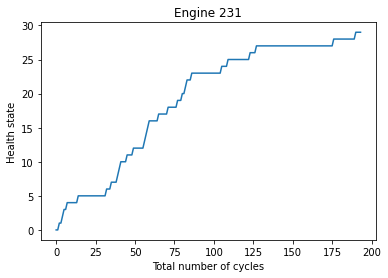

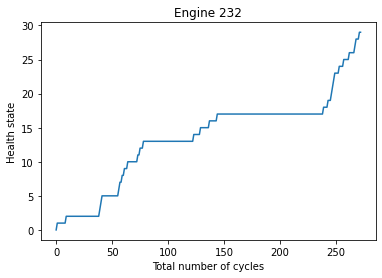

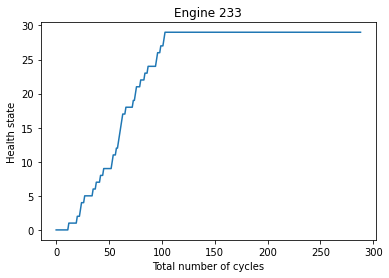

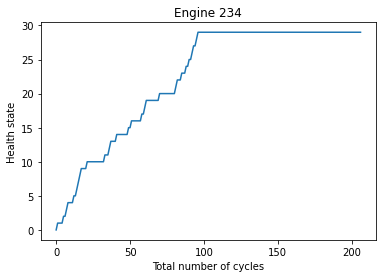

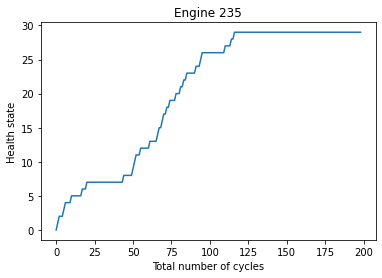

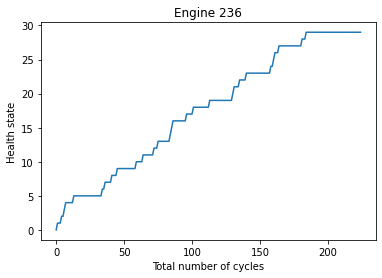

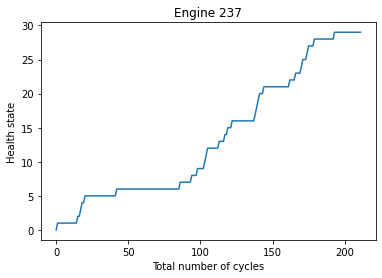

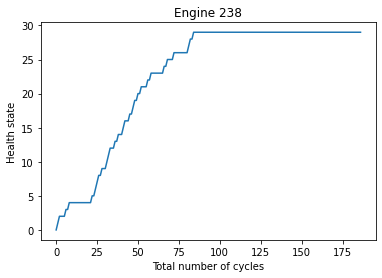

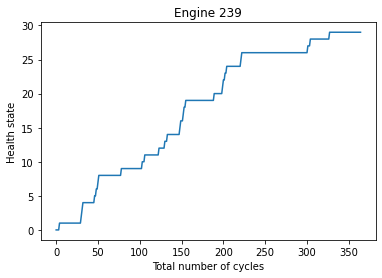

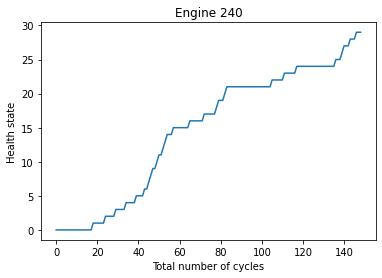

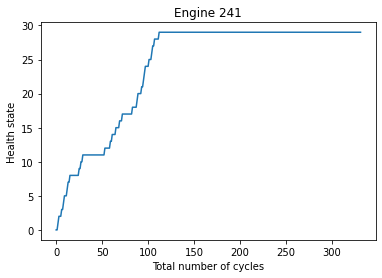

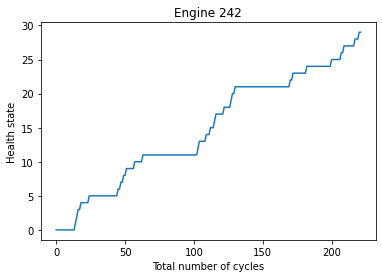

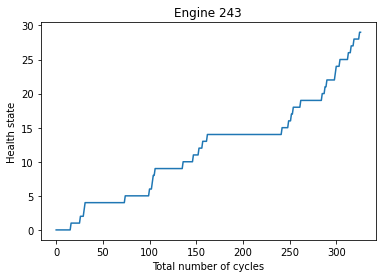

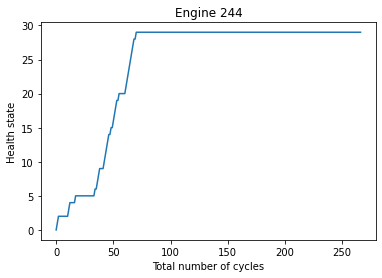

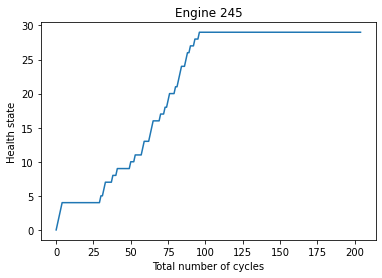

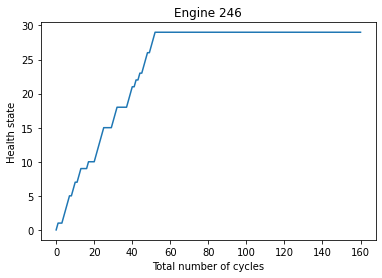

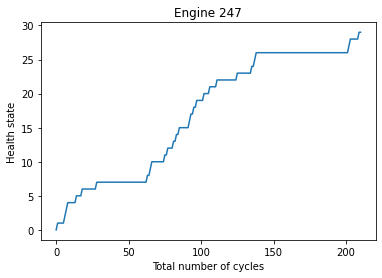

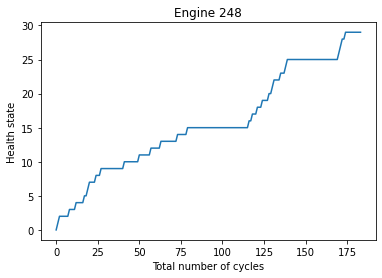

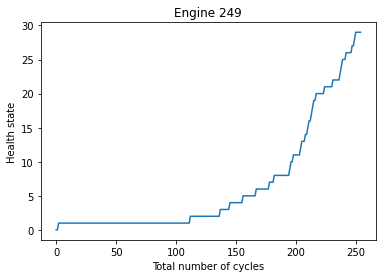

In [25]:
import matplotlib.pyplot as plt
for i in range(0,engines):
  plt.plot(health_state[i])
  plt.xlabel('Total number of cycles')
  plt.ylabel('Health state')
  plt.title(f'Engine %d'%(i+1))
  plt.show()